# Unraveling Wine Quality Patterns - Data Exploration
    IBM Data Science Capstone Project

## Environment Set Up

### Requisites

In [1]:
!pip install pandas ucimlrepo matplotlib seaborn

### Imports

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

### Config

In [3]:
%matplotlib inline
pd.set_option('display.max_columns', None)

## Dataset - UCI Wine Quality

### Load Dataset

In [4]:
# UCI Dataset
wine_quality = fetch_ucirepo(id=186) 
data = wine_quality.data.original # The dataframe
metadata = wine_quality.metadata # Some extra information

### Dataset Information

Red and White 'vinho verde' wine samples, from the north of Portugal.


In [5]:
print(f"Name: {metadata['name']}\n"
      f"Wines: {metadata['num_instances']} | Features: {metadata['num_features']} | Targets: Quality & Color\n"
      f"Repository: {metadata['repository_url']} | CSV: {metadata['data_url']} | DOI: {metadata['dataset_doi']}")

Name: Wine Quality
Wines: 4898 | Features: 11 | Targets: Quality & Color
Repository: https://archive.ics.uci.edu/dataset/186/wine+quality | CSV: https://archive.ics.uci.edu/static/public/186/data.csv | DOI: 10.24432/C56S3T


### Dataset Visualization

In [6]:
wines = pd.DataFrame(data)
wines

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Types

Most of the features are numerical, with the exception of the color variable, which is categorical.

In [7]:
wines.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

### Missing Values

There are no missing values in the dataset.

In [8]:
wines.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

### Variables Analysis

#### Categorical

In [9]:
wines['color'].describe()

count      6497
unique        2
top       white
freq       4898
Name: color, dtype: object

#### Numerical

In [10]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Univariate Analysis

From visualizing the histograms we can see that there are much more white wine samples than red wine samples.

The variable is unbalanced, and we should take this into account when training the model.

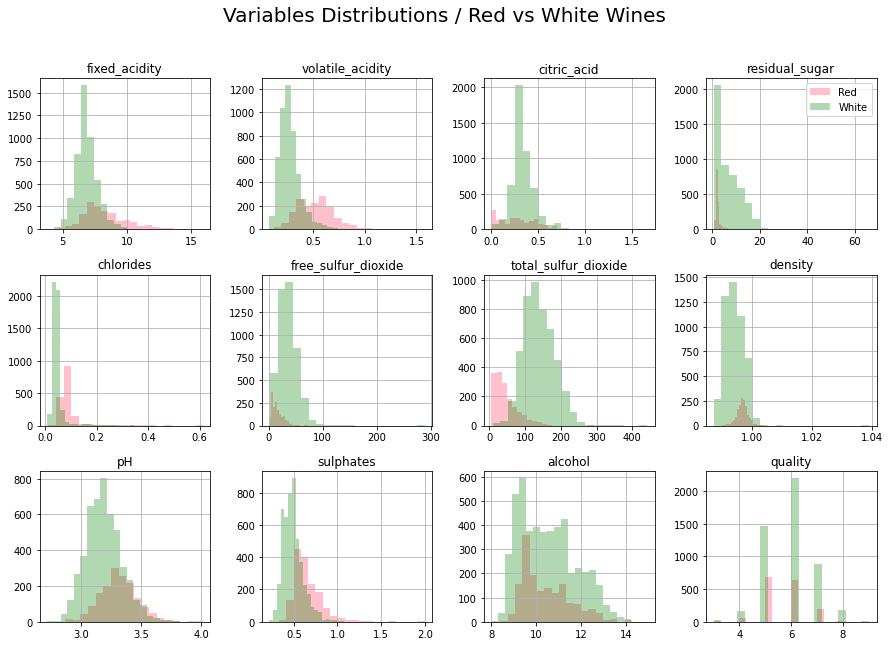

In [11]:
# Variable Distribution - Histogram
red_wines = wines[wines['color'] == 'red']
white_wines = wines[wines['color'] == 'white']

# Plot histograms
plt.figure(figsize=(15,10))
for i in range(len(red_wines.columns)-1):
    plt.subplot(3,4,i+1)
    plt.hist(red_wines[red_wines.columns[i]], bins=20, color='pink')
    plt.hist(white_wines[white_wines.columns[i]], bins=20, color='green', alpha=0.3)
    if i == 3:
        plt.legend(['Red', 'White'])
    plt.title(red_wines.columns[i])
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.3)
    plt.grid()

plt.suptitle('Variables Distributions / Red vs White Wines', fontsize=20)
plt.savefig('./assets/histogram.png', dpi=600, bbox_inches='tight')
plt.show()

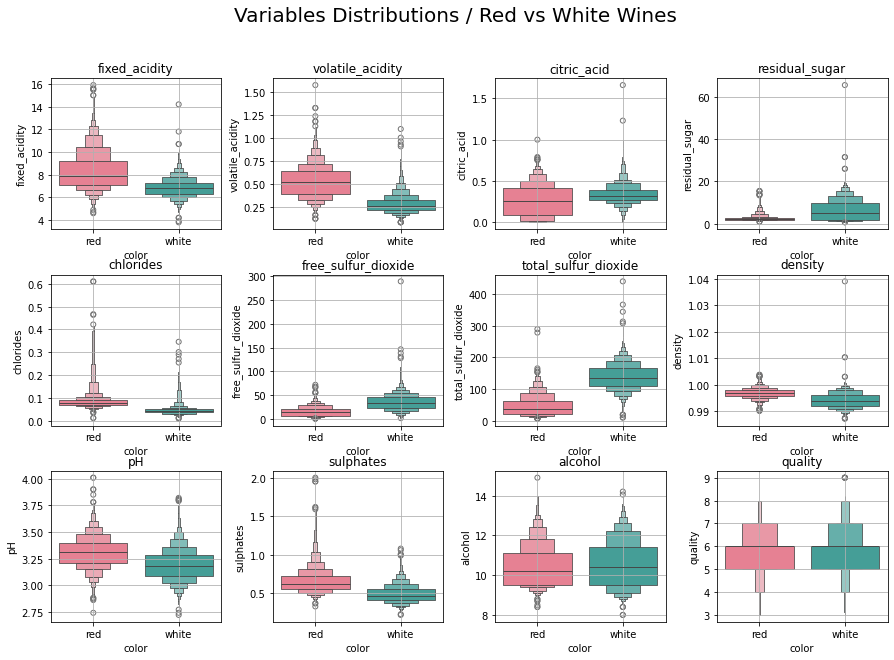

In [12]:
# Seaborn boxplot
plt.figure(figsize=(15,10))
for i in range(len(red_wines.columns)-1):
    plt.subplot(3,4,i+1)
    sns.boxenplot(x='color', y=red_wines.columns[i], data=wines, palette='husl', hue='color', legend=False)
    plt.title(red_wines.columns[i])
    plt.grid()
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.3)

plt.suptitle('Variables Distributions / Red vs White Wines', fontsize=20)
plt.savefig('./assets/boxplot.png', dpi=600, bbox_inches='tight')
plt.show()

#### Multivariate Analysis

Both the correlation matrix and the pairplot suggest a non-linear relationship between the features and the target variable. 

<Axes: >

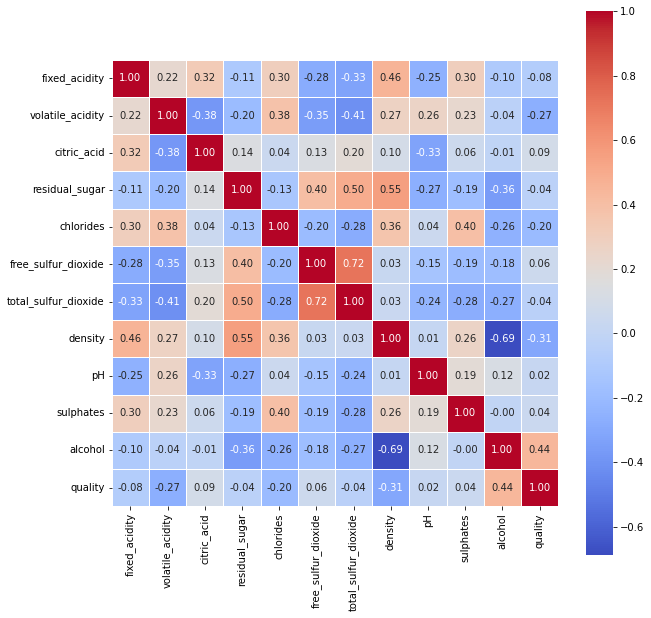

In [13]:
# Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(wines.corr(), cmap='coolwarm', annot=wines.corr(), fmt='.2f', cbar=True, square=True, linewidths=0.5)

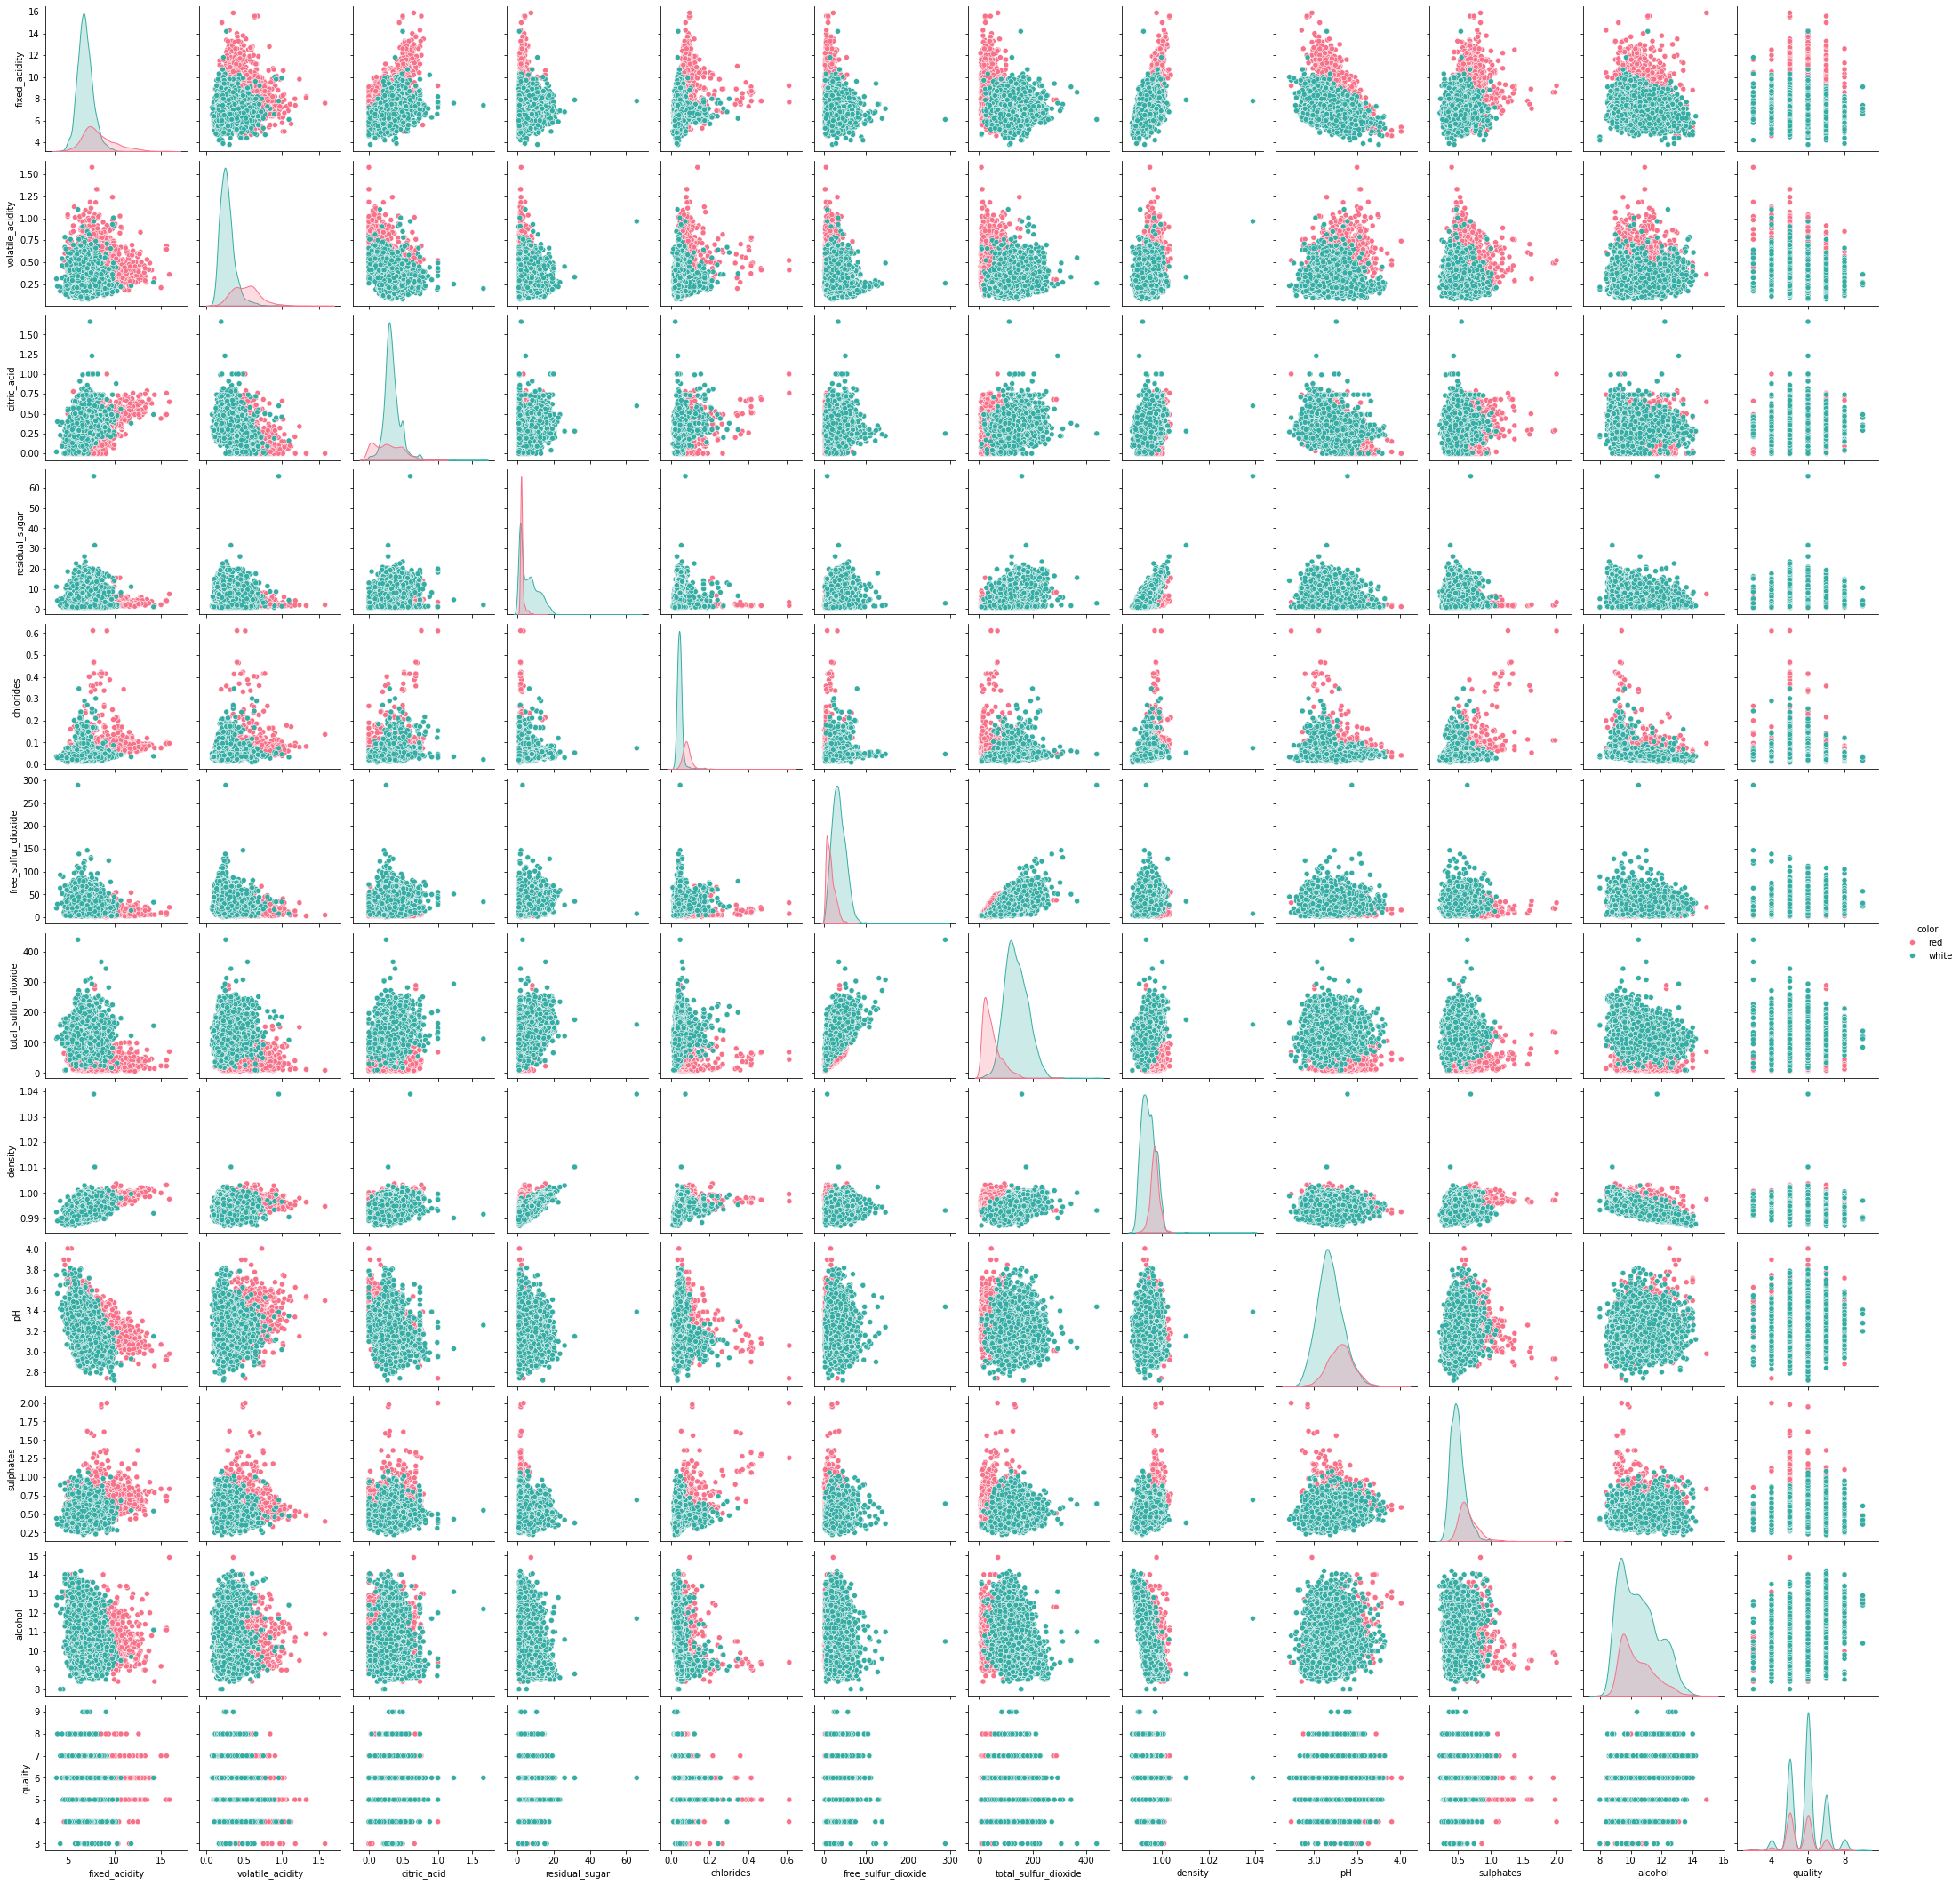

In [14]:
# Pairplot Scatter Analysis
sns.pairplot(wines, hue='color', palette='husl')
plt.savefig('./assets/pairplot.png', dpi=600, bbox_inches='tight')
plt.show()